<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/MN2022_1_Int_Ajus_Clase_06u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Presentación Clase

**Nombres:** 

Esteban Velilla H.

Jaime A. Valencia V.


**Email:**

esteban.velilla@udea.edu.co

jalejandro.valencia@udea.edu.co


**Curso:**
Métodos numéricos 2022-1

**Fecha:**
Martes 2022-juno-14

# Descripción

**Objetivos**

Presentación introducción de interpolacion y ajuste de datos. Elemenos teoricos capitulo 3 del texto guia de Burde y Faires.


**Desarrollo**



1.   Capitulo 3.Burde y Faires
2.   Interpolacion con polinomios
3.   Ajuste con polinomios
4.   Polyfit de numpy
5.   interpolacion segmentada




# Modulos principales

Importacion de modulo principales de trabajo en Metodos Numericos.

In [ ]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

Observacion de las versiones de los modulos importados.

In [ ]:
print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.7.3
Version sympy:  1.7.1


# Capitulo 3. Burden y Faires

##**Ejemplo inicial**

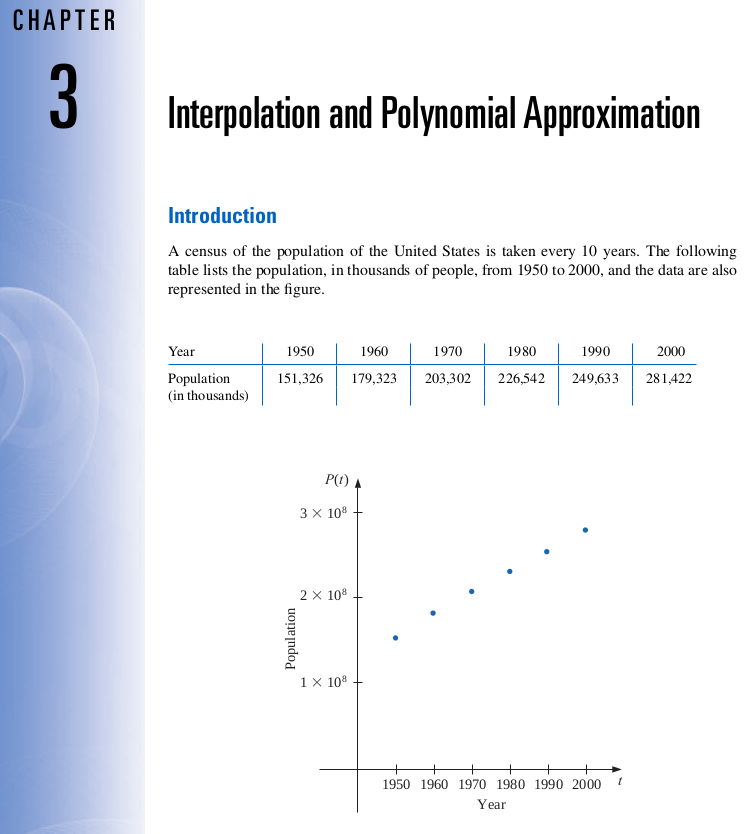

##**Teorema de Weierstrass**

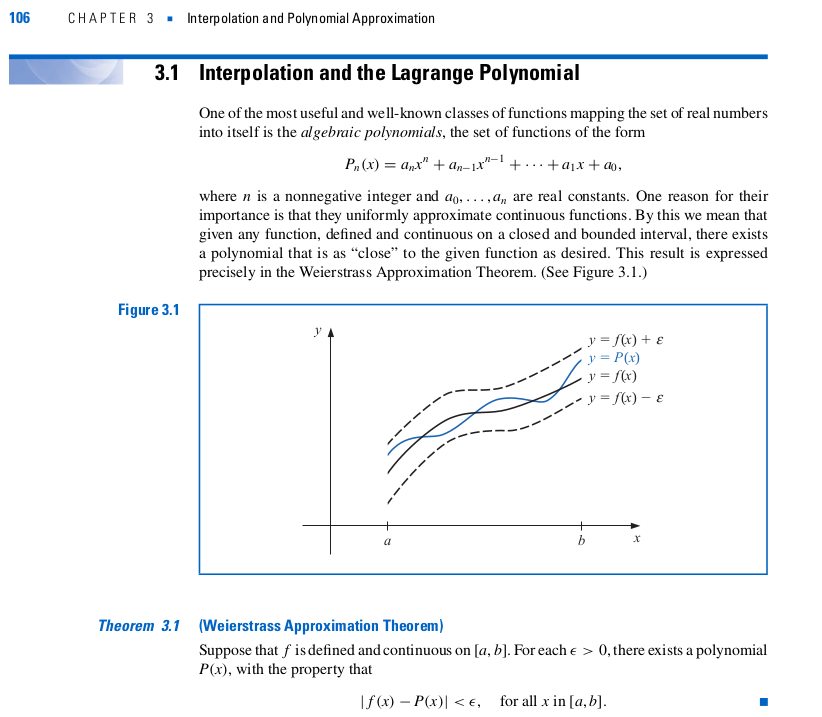

##**Teorema de Taylor**

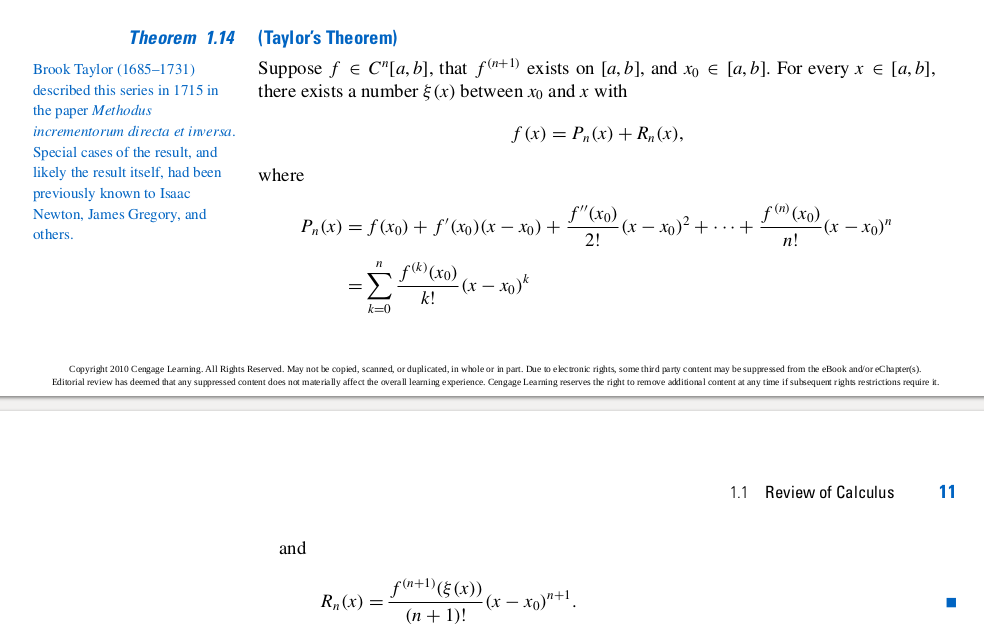

##**Polinomios de Lagrange**

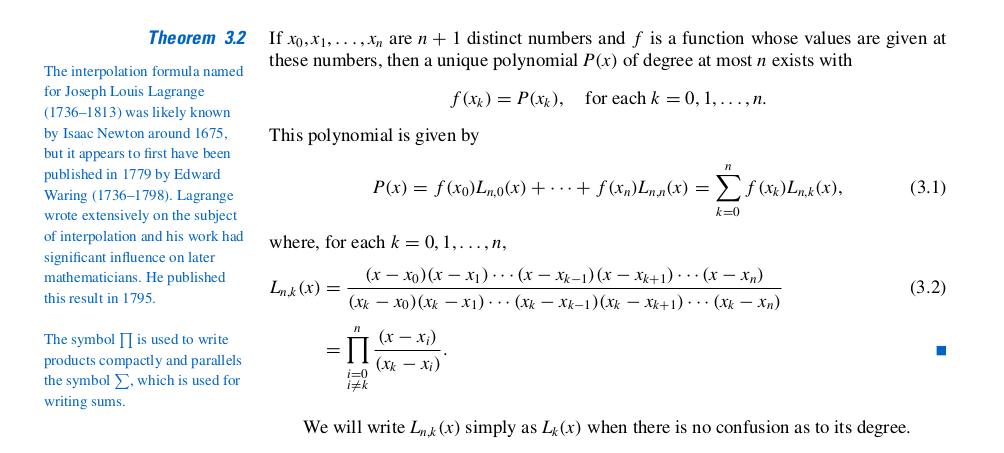

##**Diferencias divididas de Newton**

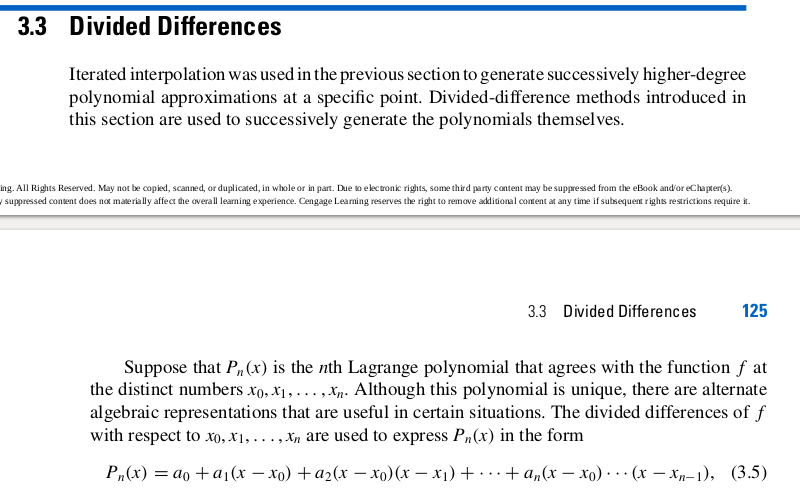

##**Interpolacion segmentada**

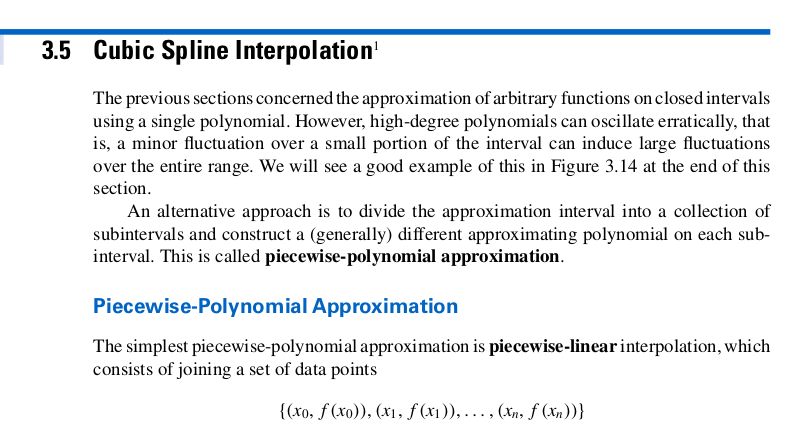

# Datos Discretos

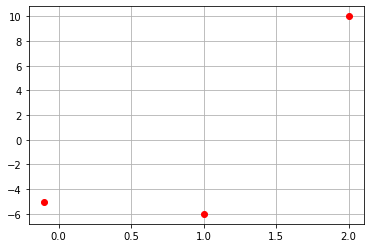

In [ ]:
##Datos discretos


x = [-0.1,1,2]
y = [-5, -6, 10]

plt.plot(x, y, "ro")
plt.grid("on")
plt.show()

# Caso Polinomio Interpolante

Matriz (Vanderpol):  [[0.010000000000000002, -0.1, 1.0], [1, 1, 1.0], [4, 2, 1.0]]
Coeficientes calculados:  [ 8.05194805 -8.15584416 -5.8961039 ]


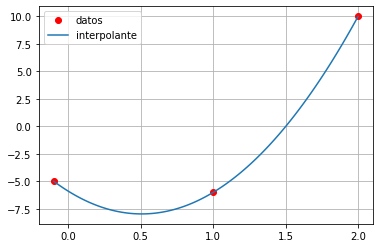

[[ 0.01 -0.1   1.  ]
 [ 1.    1.    1.  ]
 [ 4.    2.    1.  ]]


In [ ]:
# CASO Interpolante
# ajustar a polinomios a3 x**3 + a2 x**2 + a1 x  + a0 



#1. Crear matrix de ajuste
N = 2 #grado polinomio de ajuste
M_a = []
for q in x:
  F_a = []
  for k in range(N,0,-1):
    F_a.append(q**k)
  F_a.append(1.0)
  M_a.append(F_a)

print("Matriz (Vanderpol): ",M_a)

#Caso sistema cuadrado
M_a = np.array(M_a)
Coef = np.linalg.solve(M_a, y)

##Caso sistema no cuadrado
#M_aa = np.dot(M_a.T,M_a)
#B_aa = np.dot(M_a.T,y) #Solucion sistema lineal
#Coef = np.linalg.solve(M_aa, B_aa)
print("Coeficientes calculados: ",Coef)

x_rango = np.linspace(x[0],x[-1],100)
y_ajuste = []
for q in x_rango:
  yi = 0
  for k in range(N,0,-1):
    yi = yi +  Coef[N-k]*q**k
  yi = yi + Coef[-1]
  y_ajuste.append(yi)

plt.plot(x,y,"ro",x_rango,y_ajuste)
plt.legend(["datos","interpolante"])
plt.grid("on")
plt.show()

Mv = np.vander(x) # funcion de calculo directo de la matriz
print(Mv)

# Caso Polinomio de ajuste

Matriz :  [[-0.1, 1.0], [1, 1.0], [2, 1.0]]
Coeficientes calculados:  [ 7.00906344 -7.10876133]


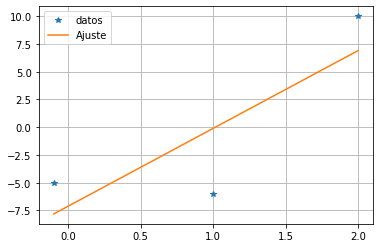

In [ ]:
# CASO Interpolante
# ajustar a polinomios a1 x  + a0 



#1. Crear matrix de ajuste
N = 1 #grado polinomio de ajuste
M_a = []
for q in x:
  F_a = []
  for k in range(N,0,-1):
    F_a.append(q**k)
  F_a.append(1.0)
  M_a.append(F_a)

print("Matriz : ",M_a)

#Caso sistema cuadrado
M_a = np.array(M_a)

M_aa = np.dot(M_a.T,M_a)
B_aa = np.dot(M_a.T,y) #Solucion sistema lineal
Coef = np.linalg.solve(M_aa, B_aa)
print("Coeficientes calculados: ",Coef)

x_rango = np.linspace(x[0],x[-1],100)
y_ajuste = []
for q in x_rango:
  yi = 0
  for k in range(N,0,-1):
    yi = yi +  Coef[N-k]*q**k
  yi = yi + Coef[-1]
  y_ajuste.append(yi)

plt.plot(x,y,"*",x_rango,y_ajuste)
plt.legend(["datos","Ajuste"])
plt.grid("on")
plt.show()

# Ajute usando polyfit

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Polinomio:  [ 0.08630207  0.16217401  0.28230626  0.39561886  0.13488498 -1.87300568
 -5.18828049]


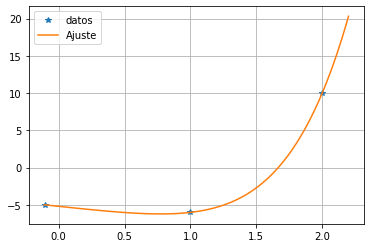

In [ ]:
#funcion de numpy para interpolacion y ajuste polinomial
PA = np.polyfit(x,y,6)# 

print("Polinomio: ",PA)

x_rango = np.linspace(1.1*x[0],x[-1]*1.1,100)

y_ajuste = np.polyval(PA,x_rango)

plt.plot(x,y,"*",x_rango,y_ajuste)
plt.legend(["datos","Ajuste"])
plt.grid("on")
plt.show()


# Interpolacion scipy (segmentada)

Datos discretos [x,y]: 
 [-0.1, 1, 2] 
 [-5, -6, 10]


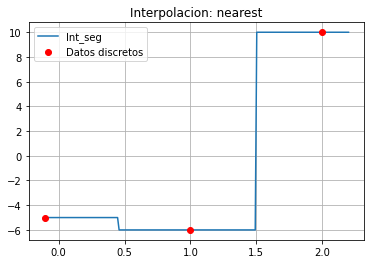

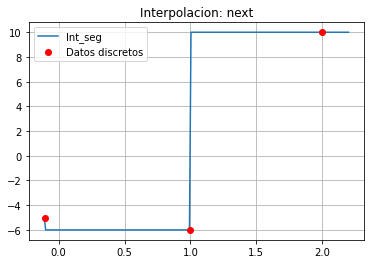

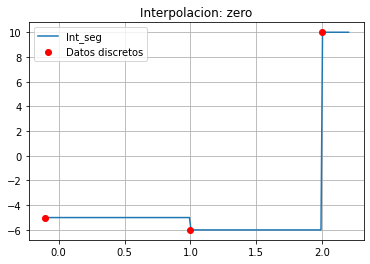

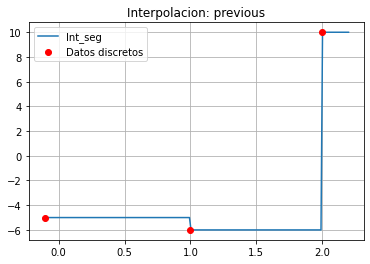

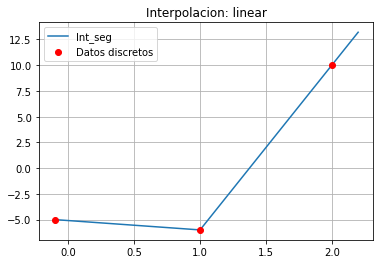

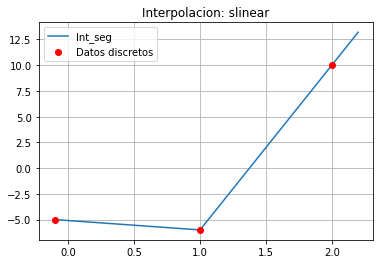

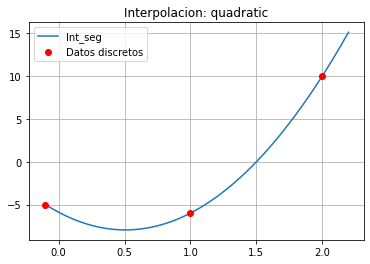

ValueError: ignored

In [ ]:
import scipy.interpolate as ID

print("Datos discretos [x,y]: \n",x,"\n",y)


IT=[ "nearest", "next","zero", "previous","linear","slinear", "quadratic", "cubic"]


x_ri = np.linspace(1.1*x[0],1.1*x[-1],200)

for k in IT:
  F_intp = ID.interp1d(x,y,kind= k ,fill_value="extrapolate")
  y_ri = F_intp(x_ri)

  plt.plot(x_ri, y_ri, x,y,"ro")
  plt.legend(["Int_seg", "Datos discretos"])
  plt.grid("on")
  plt.title("Interpolacion: "+k)
  plt.show()

# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**



*Libros*

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)





[scipy-interpolate 1.8.1](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#)  [1.4.1](https://docs.scipy.org/doc/scipy-1.4.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

[2017-marzo-15 Prezi](http://numericalmethodsie20152udea.blogspot.com/2017/03/interpolacion-ajuste-y-procesamieto-de.html)

[Guia Burden y Chapra](http://numericalmethodsie20152udea.blogspot.com/2017/03/documentacion-interpolacion-y-ajuste.html)

[2016-sep-14](http://numericalmethodsie20152udea.blogspot.com/2016/09/ajuste-de-funcion-no-lineal.html)

[2016-sep-7](http://numericalmethodsie20152udea.blogspot.com/2016/09/interpolacion-y-ajuste-de-datos.html)